<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Two_dimensional_array_and_gradient_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Linear function

In [ ]:
import numpy as np

y = lambda x: 0.5*x + 1
x_range = np.arange(-50, 50.1, 0.1)
y_range = y(x_range)

---

[Problem 2] Array combination

In [ ]:
xy_array = np.column_stack((x_range, y_range))

---

[Problem 3] Find the gradient

In [ ]:
# gradient = np.diff(xy_array[:,1]) /np.diff(xy_array[:,0])
# The previous operation can be more simplified like this
gradient = np.diff(y_range) / np.diff(x_range)

---

[Problem 4] Draw a graph

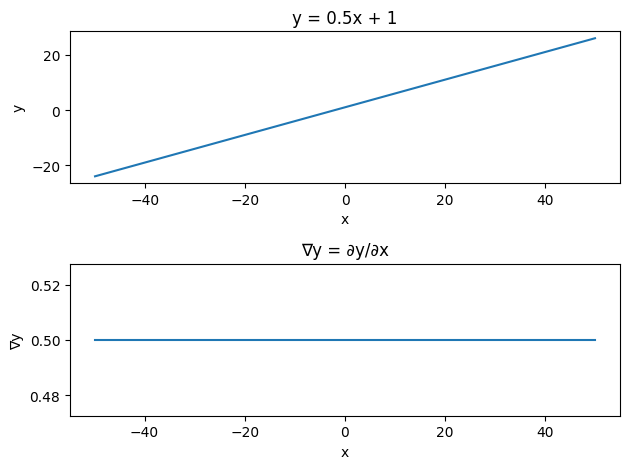

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2)

# Plot for y = 0.5x + 1
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("y = 0.5x + 1")
axs[0].plot(x_range, y_range)

# Plot for ∇y = ∂y/∂x
axs[1].set_xlabel("x")
axs[1].set_ylabel("∇y")
axs[1].set_title("∇y = ∂y/∂x")
axs[1].plot(xy_array[1:,0], gradient)

plt.tight_layout()
plt.show()

---

[Problem 5] Python functionalization

In [ ]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    np_x_range = np.arange(*x_range)
    array_xy = np.column_stack((np_x_range, function(np_x_range)))
    gradient = np.diff(array_xy[:,1]) /np.diff(array_xy[:,0])
    return array_xy, gradient

In [ ]:
# Function f: y = x^2 for -50 <= x <= 50
f = lambda x: x**2
array_xy_f, gradient_f = compute_gradient(f)

# Function g: y = 2x^2 + 2x for -50 <= x <= 50
g = lambda x: 2*x**2 + 2*x
array_xy_g, gradient_g = compute_gradient(f)

# Function h: y = sin(sqrt(x)) for 0 <= x <= 50
h = lambda x: np.sin(np.sqrt(x))
array_xy_h, gradient_h = compute_gradient(h, x_range=(0, 50.1, 0.1))

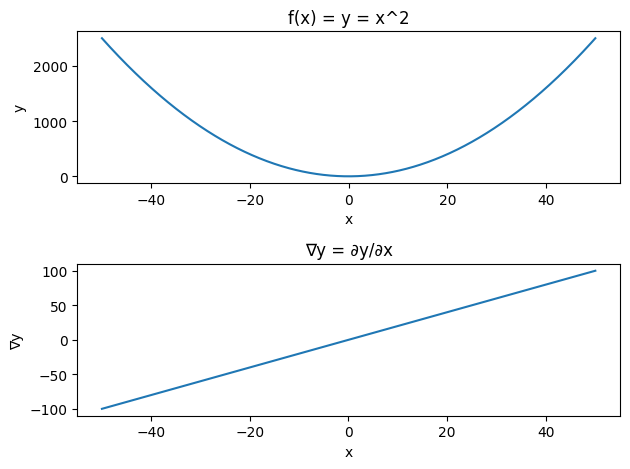

In [ ]:
fig, axs = plt.subplots(2)

# Plot for f: y = x^2 for -50 <= x <= 50
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("f(x) = y = x^2")
axs[0].plot(array_xy_f[:,0], array_xy_f[:,1])

# Plot for ∇y = ∂y/∂x
axs[1].set_xlabel("x")
axs[1].set_ylabel("∇y")
axs[1].set_title("∇y = ∂y/∂x")
axs[1].plot(array_xy_f[1:,0], gradient_f)

plt.tight_layout()
plt.show()

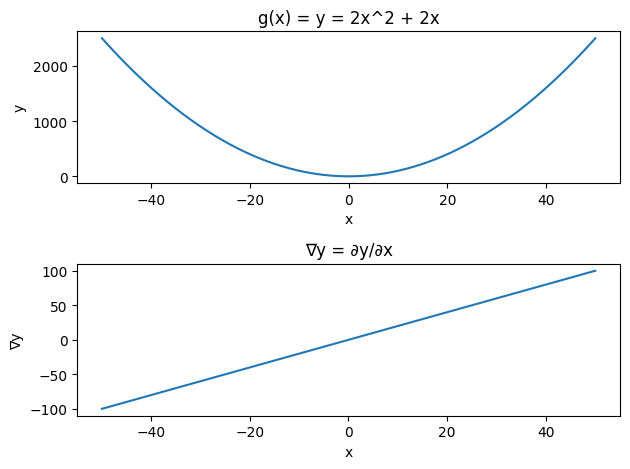

In [ ]:
fig, axs = plt.subplots(2)

# Plot for g: y = 2x^2 + 2x for -50 <= x <= 50
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("g(x) = y = 2x^2 + 2x")
axs[0].plot(array_xy_g[:,0], array_xy_g[:,1])

# Plot for ∇y = ∂y/∂x
axs[1].set_xlabel("x")
axs[1].set_ylabel("∇y")
axs[1].set_title("∇y = ∂y/∂x")
axs[1].plot(array_xy_g[1:,0], gradient_g)

plt.tight_layout()
plt.show()

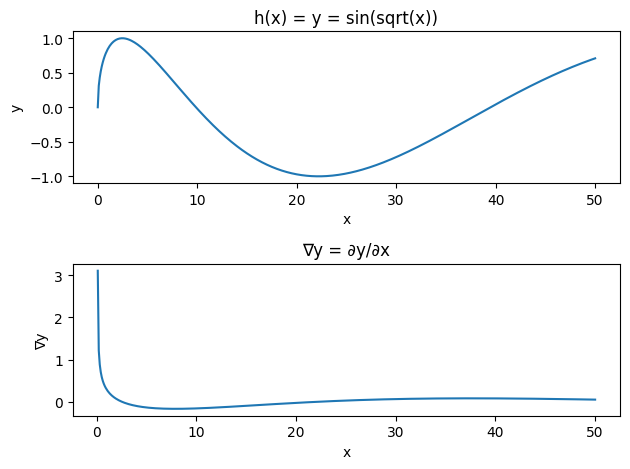

In [ ]:
fig, axs = plt.subplots(2)

# Plot for h: y = sin(sqrt(x)) for 0 <= x <= 50
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("h(x) = y = sin(sqrt(x))")
axs[0].plot(array_xy_h[:,0], array_xy_h[:,1])

# Plot for ∇y = ∂y/∂x
axs[1].set_xlabel("x")
axs[1].set_ylabel("∇y")
axs[1].set_title("∇y = ∂y/∂x")
axs[1].plot(array_xy_h[1:,0], gradient_h)

plt.tight_layout()
plt.show()

---

[Problem 6] Find the minimum value

In [ ]:
def min_and_slopes(array_xy, gradient, function_name):
    min_y = array_xy[:,1].min()
    min_index = array_xy[:,1].argmin()
    min_x = array_xy[min_index,0]
    print(f"The minimum of {function_name} is at ({min_x}, {min_y})")
    print(f"Slope before taking the minimum of {function_name} is:", gradient[min_index-1])
    print(f"Slope after taking the minimum of {function_name} is:", gradient[min_index])

In [ ]:
# Function f: y = x^2 for -50 <= x <= 50
min_and_slopes(array_xy_f, gradient_f, 'f')

The minimum of f is at (7.105427357601002e-13, 5.048709793414476e-25)
Slope before taking the minimum of f is: -0.09999999999858034
Slope after taking the minimum of f is: 0.1000000000014225


In [ ]:
# Function g: y = 2x^2 + 2x for -50 <= x <= 50
min_and_slopes(array_xy_g, gradient_g, 'g')

The minimum of g is at (7.105427357601002e-13, 5.048709793414476e-25)
Slope before taking the minimum of g is: -0.09999999999858034
Slope after taking the minimum of g is: 0.1000000000014225


In [ ]:
# Function h: y = sin(sqrt(x)) for 0 <= x <= 50
min_and_slopes(array_xy_h, gradient_h, 'h')

The minimum of h is at (22.200000000000003, -0.9999997540298113)
Slope before taking the minimum of h is: -0.0006388422559544435
Slope after taking the minimum of h is: 0.0004874477930660974
